In [57]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
import pandas as pd

In [58]:
#manual data cleaning, could've used pandas like done for task 2

newest_records = {}
over70 = {}  #over 70 years life expectancy
under70 = {} #under ^

with open('life-expectancy-vs-gdp-per-capita.csv') as f:
    f.readline()    #skip header

    for line in f.readlines():
        data = line.split(',')
        if data[2] == '' or data[3] == '' or data[4] == '': #dropping missing data
            continue

        if not data[0] in newest_records:         
            newest_records[data[0]] = (int(data[2]), float(data[3]), float(data[4])) #year, lifeexpect, gdp

        else:
            if int(newest_records[data[0]][0]) < int(data[2]):                
                newest_records[data[0]] = (int(data[2]), float(data[3]), float(data[4])) #year, lifeexpect, gdp             

for l in newest_records: 
    if newest_records[l][1] > 70:
        over70[l] = newest_records[l]
    else:
        under70[l] = newest_records[l]


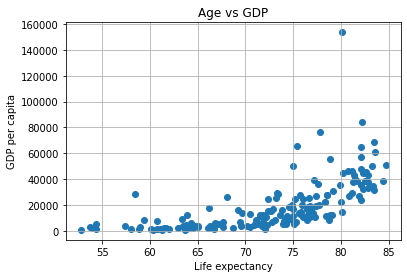

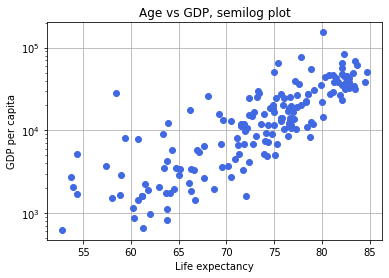

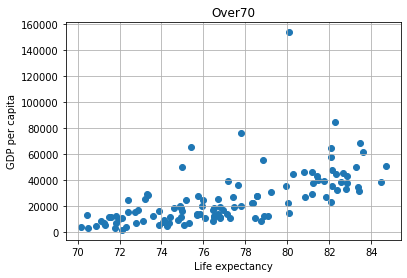

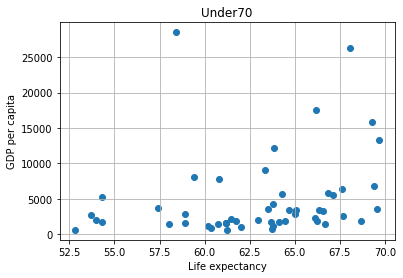

In [59]:
#plots
plt.title('Age vs GDP')
plt.grid(True)
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
land = np.array(list(newest_records.values()))
plt.scatter(land[:, 1], land[:, 2])
plt.show()

plt.title('Age vs GDP, semilog plot')
plt.grid(True)
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
land = np.array(list(newest_records.values()))
plt.semilogy(land[:, 1], land[:, 2], 'o', color= 'royalblue')
plt.show()

plt.title('Over70')
plt.grid(True)
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
land = np.array(list(over70.values()))
plt.scatter(land[:, 1], land[:, 2])
plt.show()

plt.title('Under70')
plt.grid(True)
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
land = np.array(list(under70.values()))
plt.scatter(land[:, 1], land[:, 2])
plt.show()

In [60]:
#stats all countries

values = np.array(list(newest_records.values()))

age = values[:, 1]
gdp = values[:, 2]

mean_age = np.mean(age)
median_age = np.median(age)
sd_age = np.std(age)

mean_gdp = np.mean(gdp)
median_gdp = np.median(gdp)
sd_gdp = np.std(gdp)

#stats for countries with life expectancy above 70

values70 = np.array(list(over70.values()))

age70 = values70[:, 1]
gdp70 = values70[:, 2]

mean_age70 = np.mean(age70)
median_age70 = np.median(age70)
sd_age70 = np.std(age70)

mean_gdp70 = np.mean(gdp70)
median_gdp70 = np.median(gdp70)
sd_gdp70 = np.std(gdp70)

#stats for countries with life expectancy under 70

values_Under70 = np.array(list(under70.values()))

age_Under70 = values_Under70[:, 1]
gdp_Under70 = values_Under70[:, 2]

mean_age_Under70 = np.mean(age_Under70)
median_age_Under70 = np.median(age_Under70)
sd_age_Under70 = np.std(age_Under70)

mean_gdp_Under70 = np.mean(gdp_Under70)
median_gdp_Under70 = np.median(gdp_Under70)
sd_gdp_Under70 = np.std(gdp_Under70)

## Regression

R^2 = 0.4021801068857799


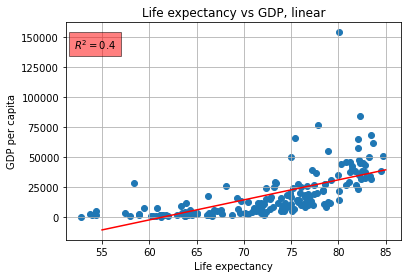

R^2 = 0.6744115938461526


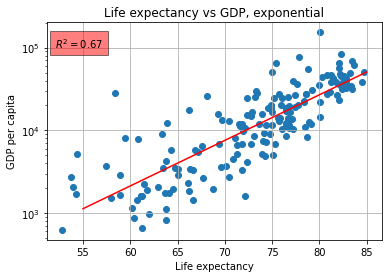

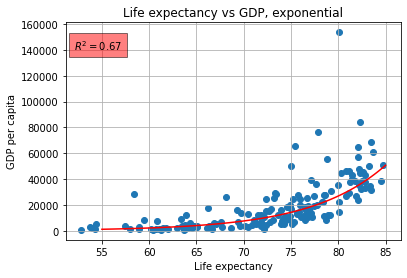

Exp coeff for all countries: [0.12691459]


In [61]:

lr = lm.LinearRegression()
#all countries
#linear

lr.fit(age.reshape(-1,1), gdp)
r2 = lr.score(age.reshape(-1,1), gdp)
print("R^2 =", r2)

xs = np.linspace(55, 85, 100)
ys = lr.coef_*xs + lr.intercept_

plt.title('Life expectancy vs GDP, linear')
plt.grid(True)
plt.text(52, 1.4e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age, gdp)
plt.plot(xs, ys, 'r-')
plt.show()
#exponential

lr.fit(age.reshape(-1,1), np.log(gdp))
r2 = lr.score(age.reshape(-1,1), np.log(gdp))
print("R^2 =", r2)

ys = lr.coef_*xs + lr.intercept_

plt.title('Life expectancy vs GDP, exponential')
plt.text(52, 1e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.grid(True)
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age, gdp)
plt.semilogy(xs, np.exp(ys), 'r-')
plt.show()

plt.title('Life expectancy vs GDP, exponential')
plt.grid(True)
plt.text(52, 1.4e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age, gdp)
plt.plot(xs, np.exp(ys), 'r-')
plt.show()

print("Exp coeff for all countries:", lr.coef_)

R^2 = 0.377134644126332


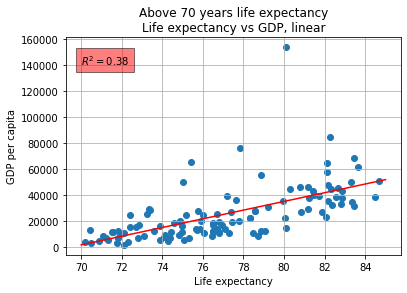

R^2 = 0.5409264246285166


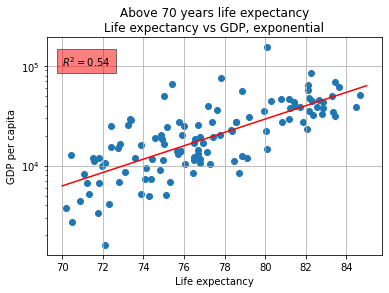

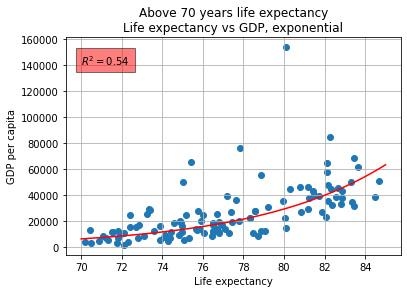

Exp coeff for over70: [0.15435913]


In [62]:
#only countries with life expectancy above 70
#linear

lr.fit(age70.reshape(-1,1), gdp70)
r2 = lr.score(age70.reshape(-1,1), gdp70)
print("R^2 =", r2)

xs = np.linspace(70, 85, 100)
ys = lr.coef_*xs + lr.intercept_

plt.title('Above 70 years life expectancy\nLife expectancy vs GDP, linear')
plt.grid(True)
plt.text(70, 1.4e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age70, gdp70)
plt.plot(xs, ys, 'r-')
plt.show()

#exponential

lr.fit(age70.reshape(-1,1), np.log(gdp70))
r2 = lr.score(age70.reshape(-1,1), np.log(gdp70))
print("R^2 =", r2)

ys = lr.coef_*xs + lr.intercept_

plt.title('Above 70 years life expectancy\nLife expectancy vs GDP, exponential')
plt.grid(True)
plt.text(70, 1e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age70, gdp70)
plt.semilogy(xs, np.exp(ys), 'r-')
plt.show()

plt.title('Above 70 years life expectancy\nLife expectancy vs GDP, exponential')
plt.grid(True)
plt.text(70, 1.4e5, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age70, gdp70)
plt.plot(xs, np.exp(ys), 'r-')
plt.show()

print("Exp coeff for over70:", lr.coef_)

R^2 = 0.05274670147458449


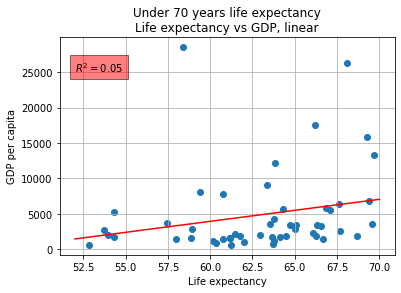

R^2 = 0.11680271475903503


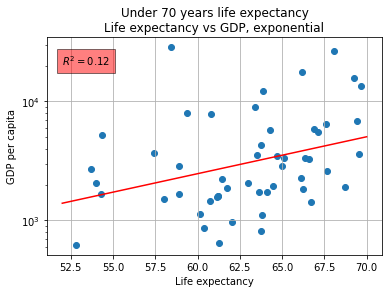

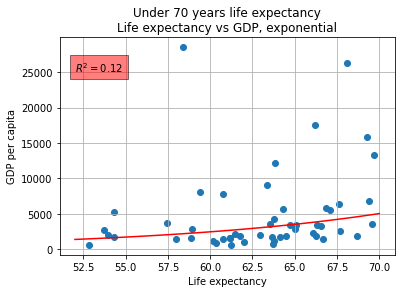

Exp coeff for under70: [0.07142021]


In [63]:
#only countries with life expectancy under 70
#linear

lr.fit(age_Under70.reshape(-1,1), gdp_Under70)
r2 = lr.score(age_Under70.reshape(-1,1), gdp_Under70)
print("R^2 =", r2)

xs = np.linspace(52, 70, 100)
ys = lr.coef_*xs + lr.intercept_

plt.title('Under 70 years life expectancy\nLife expectancy vs GDP, linear')
plt.grid(True)
plt.text(52, 25000, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age_Under70, gdp_Under70)
plt.plot(xs, ys, 'r-')
plt.show()

#exponential

lr.fit(age_Under70.reshape(-1,1), np.log(gdp_Under70))
r2 = lr.score(age_Under70.reshape(-1,1), np.log(gdp_Under70))
print("R^2 =", r2)

ys = lr.coef_*xs + lr.intercept_

plt.title('Under 70 years life expectancy\nLife expectancy vs GDP, exponential')
plt.grid(True)
plt.text(52, 20000, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age_Under70, gdp_Under70)
plt.semilogy(xs, np.exp(ys), 'r-')
plt.show()

plt.title('Under 70 years life expectancy\nLife expectancy vs GDP, exponential')
plt.grid(True)
plt.text(52, 25000, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel('Life expectancy')
plt.ylabel('GDP per capita')
plt.scatter(age_Under70, gdp_Under70)
plt.plot(xs, np.exp(ys), 'r-')
plt.show()

print("Exp coeff for under70:", lr.coef_)

In [64]:
#countries that live long
long_lives = []
for country in newest_records:
    if newest_records[country][1] > mean_age + sd_age:        
        long_lives.append(country)

print("Lives long:\n", long_lives)


#rich countries
rich_countries = []

for country in newest_records:
    if newest_records[country][2] > mean_gdp + sd_gdp:        
        rich_countries.append(country)

print("Are rich:\n", rich_countries)

#rich but not long livers
rich_short_lives = []

for c in rich_countries:
    if newest_records[c][1] < mean_age + sd_age:        
        rich_short_lives.append(c)

print("Are rich but don't live long:\n", rich_short_lives)


#long livers but not rich
poor_long_lives = []

for c in long_lives:
    if newest_records[c][2] < mean_gdp + sd_gdp:
        poor_long_lives.append(c)

print("Live long but are not rich:\n", poor_long_lives)

Lives long:
 ['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']
Are rich:
 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Denmark', 'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Kuwait', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sweden', 'Switzerland', 'Taiwan', 'United Arab Emirates', 'United States']
Are rich but don't live long:
 ['Bahrain', 'Kuwait', 'Qatar', 'Saudi Arabia', 'Taiwan', 'United Arab Emirates', 'United States']
Live long but are not rich:
 ['Cyprus', 'Finland', 'France', 'Greece', 'Israel', 'Italy', 'Japan', 'Malta', 'New Zealand', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'United Kingdom']


# TASK 2

R^2 = 0.5811191535818017


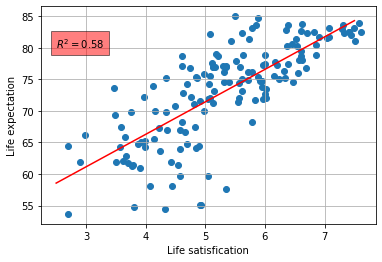

In [65]:
#life satisfication vs life expectation

df = pd.read_csv("life-satisfaction-vs-life-expectancy.csv")
df = df.drop("Continent", axis=1).dropna().drop_duplicates(subset="Entity", keep='last')

stats = df[['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)', "Life satisfaction in Cantril Ladder (World Happiness Report 2021)"]]

lifeExpect = np.array(stats["Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)"])
lifeSatis = np.array(stats["Life satisfaction in Cantril Ladder (World Happiness Report 2021)"])

lr.fit(lifeSatis.reshape(-1, 1), lifeExpect)

r2 = lr.score(lifeSatis.reshape(-1, 1), lifeExpect)
print('R^2 =', r2)

xs = np.linspace(2.5, 7.5, 2)
ys = lr.coef_*xs + lr.intercept_


plt.grid(True)
plt.text(2.5, 80, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel("Life satisfication")
plt.ylabel("Life expectation")
plt.scatter(lifeSatis, lifeExpect)
plt.plot(xs, ys, 'r-')
plt.show()

Code                                                                     UZB
Year                                                                    2018
Corruption Perception Index - Transparency International (2018)           23
Trust                                                              99.219376
Name: Uzbekistan, dtype: object
R^2 = 0.03730727319098659


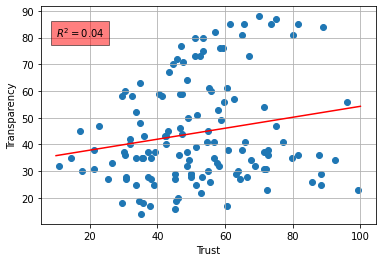

In [66]:
#trust vs transparency

df1 = pd.read_csv("trust.csv").dropna().drop_duplicates(subset="Entity", keep='last')
df2 = pd.read_csv("corruption_perception.csv").dropna().drop_duplicates(subset="Entity", keep='last')

df2['Trust'] = df2["Entity"].map(df1.set_index('Entity')['Share of people who trust their national government'])
df2 = df2.dropna()

df2 = df2.set_index("Entity")
print(df2.loc["Uzbekistan"])

trust = np.array(df2['Trust'])
corruption = np.array(df2['Corruption Perception Index - Transparency International (2018)'])

lr.fit(trust.reshape(-1, 1), corruption)

r2 = lr.score(trust.reshape(-1, 1), corruption)
print('R^2 =', r2)

xs = np.linspace(10, 100, 2)
ys = lr.coef_*xs + lr.intercept_

plt.grid(True)
plt.text(10, 80, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel("Trust")
plt.ylabel("Transparency")
plt.scatter(trust, corruption)
plt.plot(xs, ys, 'r-')
plt.show()

R^2 = 0.49006336978025455


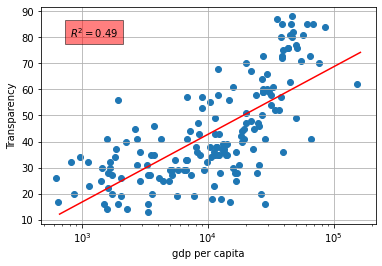

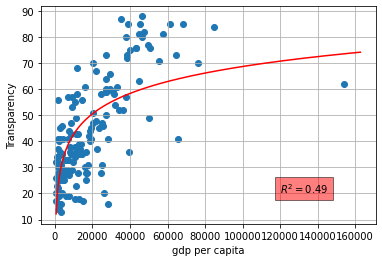

In [67]:
#GDP vs transparency

df1 = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv").drop(["145446-annotations", "Population (historical estimates)", "Continent"], 1).dropna().drop_duplicates(subset="Entity", keep="last")
df2 = pd.read_csv("corruption_perception.csv").dropna().drop_duplicates(subset="Entity", keep='last')
df1['Transparency'] = df1["Entity"].map(df2.set_index('Entity')['Corruption Perception Index - Transparency International (2018)'])
df1 = df1.dropna()

gdp = np.array(df1['GDP per capita'])
transparency = np.array(df1['Transparency'])

lr.fit(np.log(gdp.reshape(-1, 1)), transparency)

r2 = lr.score(np.log(gdp.reshape(-1, 1)), transparency)
print('R^2 =', r2)

xs = np.linspace(6.5, 12, 2000)
ys = lr.coef_*xs + lr.intercept_


plt.grid(True)
plt.text(0.8e3, 80, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel("gdp per capita")
plt.ylabel("Transparency")
plt.scatter(gdp, transparency)
plt.semilogx(np.exp(xs), ys, 'r-')
plt.show()

plt.grid(True)
plt.text(120000, 20, r"$R^2 = $" + str(np.round(r2, 2)), bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
plt.xlabel("gdp per capita")
plt.ylabel("Transparency")
plt.scatter(gdp, transparency)
plt.plot(np.exp(xs), ys, 'r-')
plt.show()
